<a href="https://colab.research.google.com/github/Gusta02/Analise_vendas_pyspark/blob/main/Analise_vendas_pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalando o PySpark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285397 sha256=a8386a7c75924bb6ff6bbc7db137a18e6086125c3f14bd830ed0be8eb22ec4ee
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [2]:
# Importando bibliotecas
from pyspark.sql import SparkSession

# Iniciando uma sessão PySpark
spark = SparkSession.builder.appName("Análise de Filmes").getOrCreate()

# Importando bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
# Carregando os dados
ratings_data_path = "/content/rating.csv"
movies_data_path = "/content/movie.csv"

ratings_df = spark.read.csv(ratings_data_path, header=True, inferSchema=True)
movies_df = spark.read.csv(movies_data_path, header=True, inferSchema=True)

In [20]:
# Calculando a média das avaliações por filme e contagem total de avaliações por filme
average_ratings = ratings_df.groupBy("movieId").avg("rating").withColumnRenamed("avg(rating)", "average_rating")
ratings_count = ratings_df.groupBy("movieId").count().withColumnRenamed("count", "ratings_count")


In [22]:
# Exibindo uma pré-visualização das médias de avaliações
average_ratings.show()

+-------+------------------+
|movieId|    average_rating|
+-------+------------------+
|   3997| 2.041002277904328|
|   1580| 3.556410256410256|
|   3918|2.8764478764478763|
|   2366|3.5443548387096775|
|   3175| 3.614453542185831|
|   4519| 3.193298969072165|
|   1591|2.5826369545032497|
|    471|3.6480176211453745|
|  36525|3.4463519313304722|
|  44022| 3.339175257731959|
|   2866|3.6587837837837838|
|   1645|3.4551201011378003|
|   5803| 2.825980392156863|
|  54190| 3.586750788643533|
|   1088|3.1629545454545456|
|    833| 2.792682926829268|
|   8638|3.8715328467153283|
|    463|2.8373493975903616|
|   1959|3.6168451801363193|
|   2659|3.0555555555555554|
+-------+------------------+
only showing top 20 rows



In [25]:
# Exibindo uma pré-visualização das contagens de avaliações
ratings_count.show()

+-------+-------------+
|movieId|ratings_count|
+-------+-------------+
|   3997|          439|
|   1580|         7215|
|   3918|          259|
|   2366|         1364|
|   3175|         2809|
|   4519|          388|
|   1591|         1077|
|    471|         2270|
|  36525|          233|
|  44022|          485|
|   2866|          296|
|   1645|         2373|
|   5803|          204|
|  54190|          317|
|   1088|         2200|
|    833|          287|
|   8638|          685|
|    463|           83|
|   1959|         1027|
|   2659|           54|
+-------+-------------+
only showing top 20 rows



In [26]:
# Convertendo DataFrames para Pandas
average_ratings_pd = average_ratings.toPandas()
ratings_count_pd = ratings_count.toPandas()
movies_pd = movies_df.select("movieId", "title", "genres").toPandas()

# Exibindo uma pré-visualização dos filmes carregados
movies_pd.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [27]:
# Juntando os DataFrames
movies_combined = pd.merge(average_ratings_pd, ratings_count_pd, on="movieId")
movies_combined = pd.merge(movies_combined, movies_pd, on="movieId")

# Exibindo uma pré-visualização dos filmes combinados
movies_combined.head()

,movieId,average_rating,ratings_count,title,genres
0,3997,2.041002,439,Dungeons & Dragons (2000),Adventure|Fantasy
1,1580,3.556410,7215,Men in Black (a.k.a. MIB) (1997),Action|Comedy|Sci-Fi
2,3918,2.876448,259,Hellbound: Hellraiser II (1988),Horror
3,2366,3.544355,1364,King Kong (1933),Action|Adventure|Fantasy|Horror
4,3175,3.614454,2809,Galaxy Quest (1999),Adventure|Comedy|Sci-Fi


In [28]:
# Ordenando pelo número total de avaliações
movies_combined = movies_combined.sort_values("ratings_count", ascending=False)

# Exibindo uma pré-visualização dos filmes combinados ordenados
movies_combined.head()

,movieId,average_rating,ratings_count,title,genres
536,296,4.160800,13467,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
11073,356,4.033044,13270,Forrest Gump (1994),Comedy|Drama|Romance|War
7285,318,4.451346,12702,"Shawshank Redemption, The (1994)",Crime|Drama
743,593,4.174863,12587,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
11637,480,3.667112,11980,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller


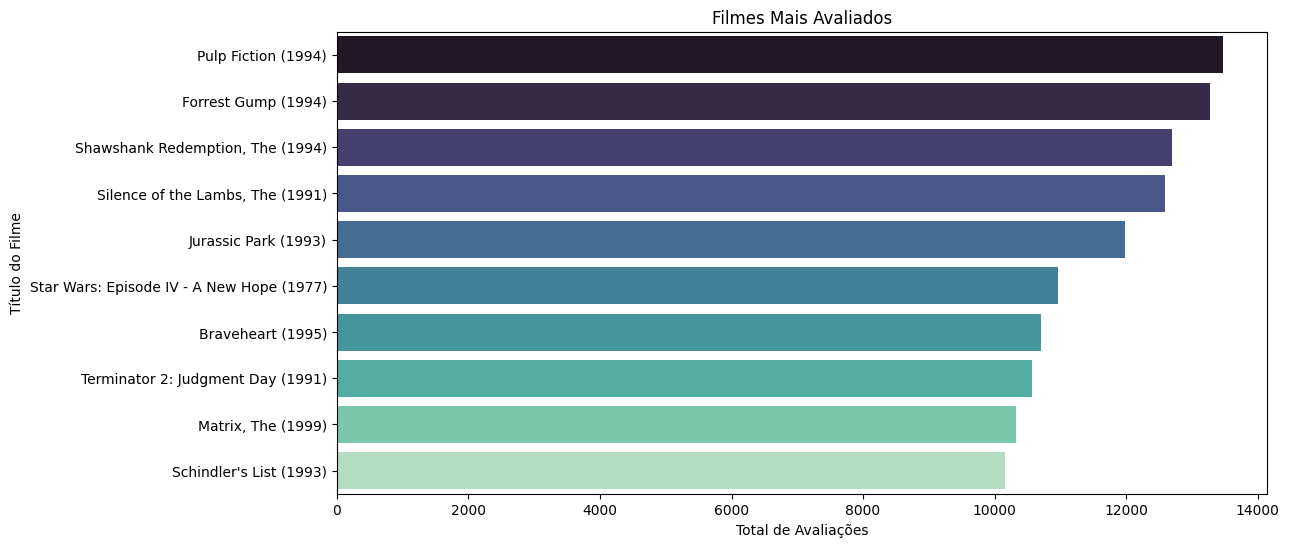

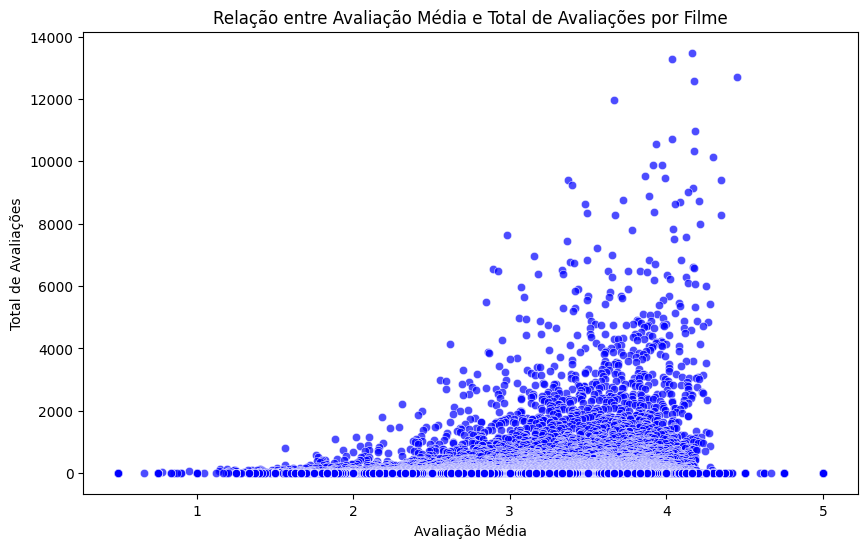

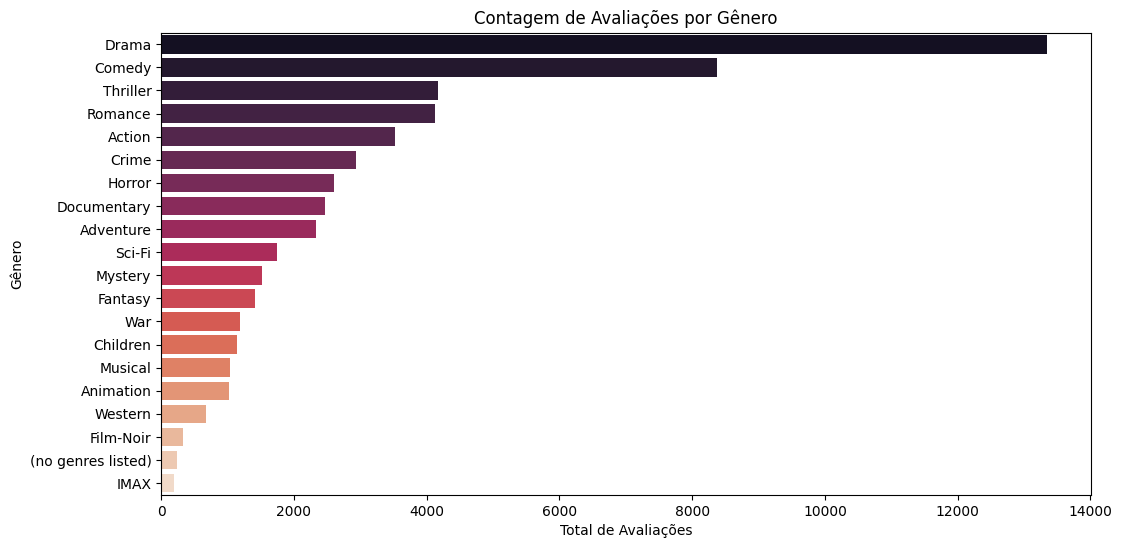

In [29]:
# Criando gráfico de barra para os 10 filmes com mais avaliações
plt.figure(figsize=(12, 6))
top_reviewed = movies_combined.nlargest(10, "ratings_count")
sns.barplot(x="ratings_count", y="title", data=top_reviewed, palette="mako")
plt.title("Filmes Mais Avaliados")
plt.xlabel("Total de Avaliações")
plt.ylabel("Título do Filme")
plt.show()

# Criando gráfico de dispersão para explorar relação entre avaliação média e total de avaliações
plt.figure(figsize=(10, 6))
sns.scatterplot(x="average_rating", y="ratings_count", data=movies_combined, alpha=0.7, color='blue')
plt.title("Relação entre Avaliação Média e Total de Avaliações por Filme")
plt.xlabel("Avaliação Média")
plt.ylabel("Total de Avaliações")
plt.show()

# Gráfico de contagem de avaliações por gênero
genre_counts = movies_pd["genres"].str.split('|', expand=True).stack().value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="rocket")
plt.title("Contagem de Avaliações por Gênero")
plt.xlabel("Total de Avaliações")
plt.ylabel("Gênero")
plt.show()
